<a href="https://colab.research.google.com/github/diamantidisgeorgios/exercise2/blob/main/Excercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import math
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier

# Load dataset

In [126]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Describe features

In [127]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Plot variables

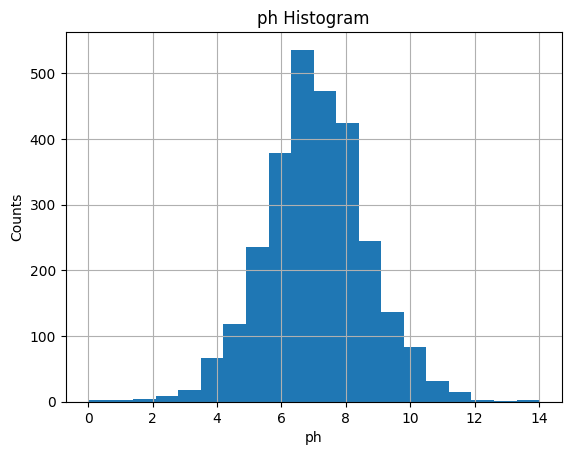

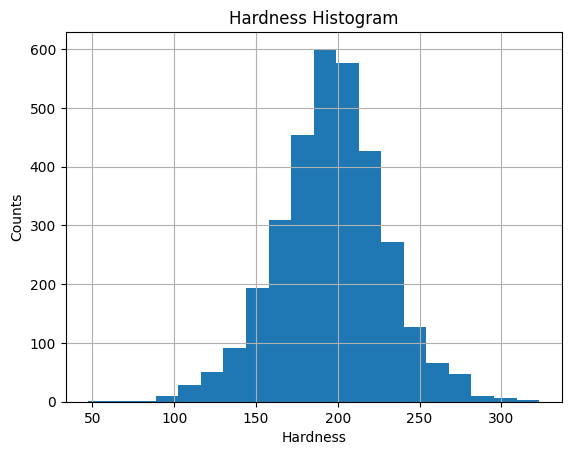

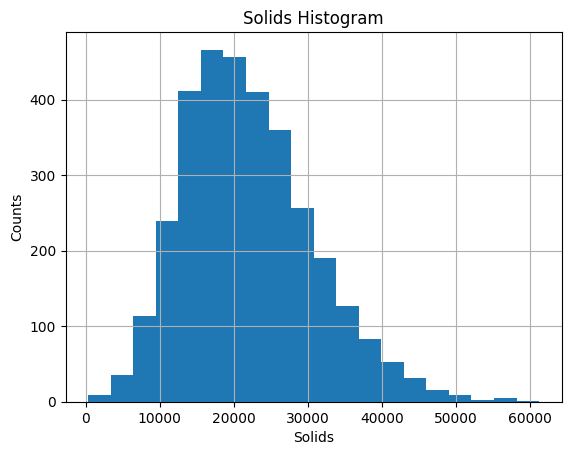

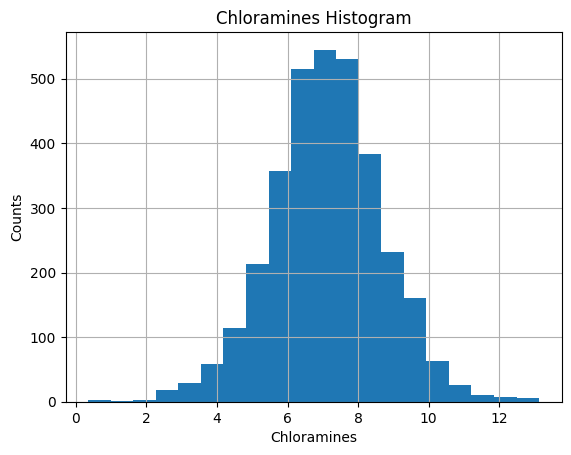

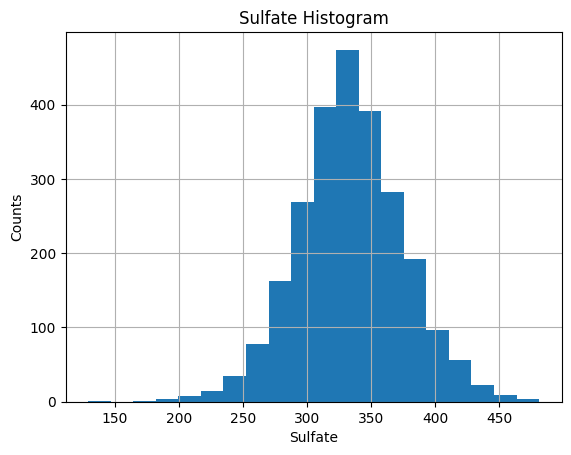

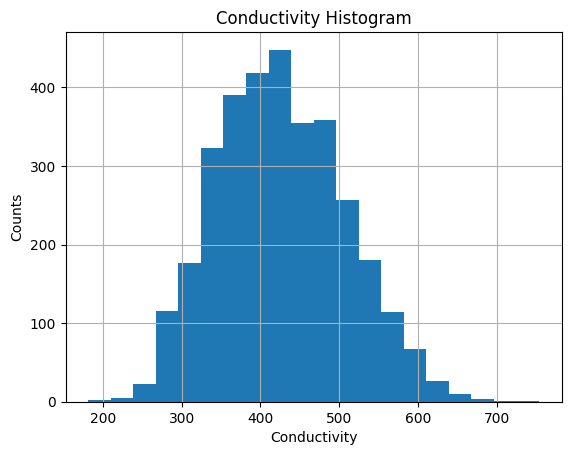

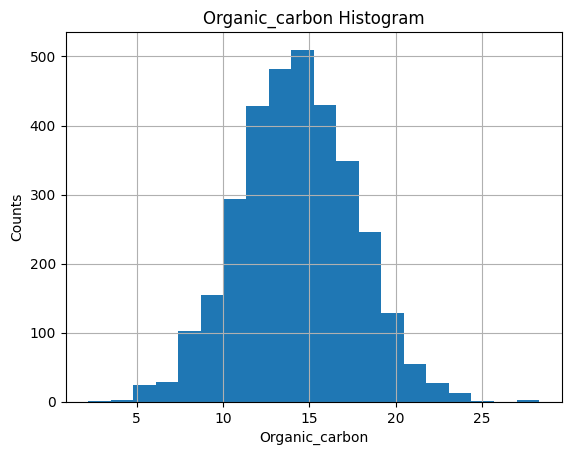

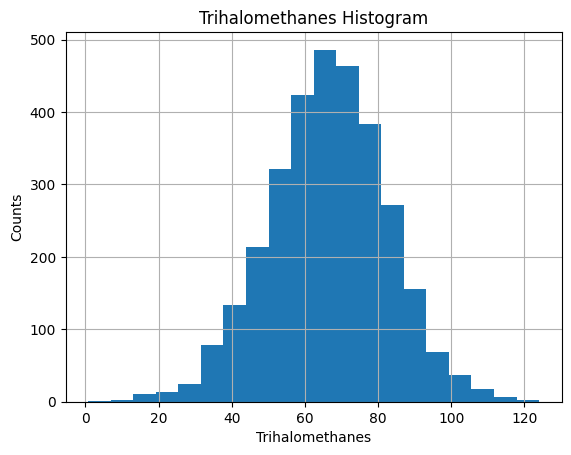

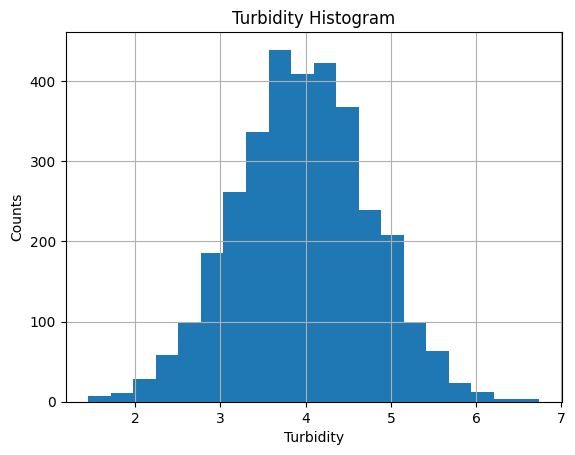

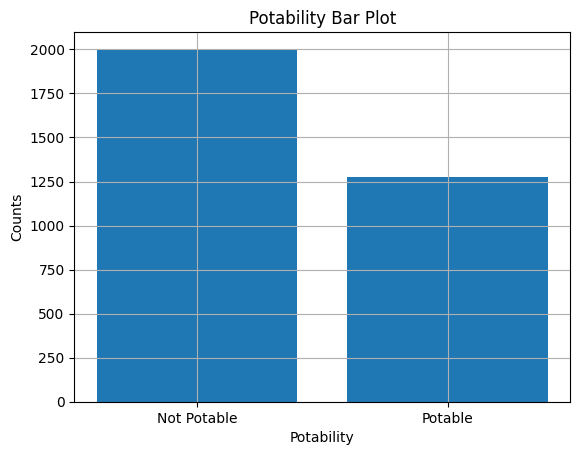

In [128]:
#Plot features histogram
for i in df.columns.drop('Potability'):
  plt.hist(df[i], bins=20)
  plt.title(f'{i} Histogram')
  plt.xlabel(f'{i}')
  plt.ylabel('Counts')
  plt.grid()
  plt.show()

#Plot Potability bar plot
plt.bar(['Not Potable', 'Potable'], df.Potability.value_counts(), data=df['Potability'])
plt.title('Potability Bar Plot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.grid()
plt.show()

# Missing values

In [129]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


### Comment on missing values

There are 491 missing valus on pH levels, 781 on Sulfate and 162 on Trihalomethanes.


# Percentage of classes

In [130]:
round((df['Potability'].value_counts()/df['Potability'].count()) * 100, 2)

,count
Potability,
0,60.99
1,39.01


### Comment on the percentage

The dataset is slightly imbalanced with 60.99% of observations being in the non potable class, while the 39.01% of observations are in the potable class.

# Comment on the dataset

The dataset should be considered mediocre, not because the classes are imbalanced, but because there are a lot of missing values.

# Class percentage for different pH values


The World Health Organination(WHO) recommends that the pH level of drinking water should be between 6.5 and 8.5.

### pH < 6.5

In [131]:
total_count = df.where((df['ph'] < 6.5)).Potability.count()
potable_count = df.where((df['ph'] < 6.5) & (df['Potability'] == 1)).Potability.count()
non_potable_count = df.where((df['ph'] < 6.5) & (df['Potability'] == 0)).Potability.count()

potable_percentage = round((potable_count / total_count) * 100, 2)
non_potable_percentage = round((non_potable_count / total_count) * 100, 2)

print(f'The percentage of potable water when the Ph is < 6.5: {potable_percentage}%')
print(f'The percentage of non potable water when the Ph is < 6.5: {non_potable_percentage}%')

The percentage of potable water when the Ph is < 6.5: 36.78%
The percentage of non potable water when the Ph is < 6.5: 63.22%


### 6.5 ≤ pH ≤ 8.5

In [132]:
total_count = df.where((df['ph'] >= 6.5) & (df['ph'] <= 8.5)).Potability.count()
potable_count = df.where((df['ph'] >= 6.5) & (df['ph'] <= 8.5) & (df['Potability'] == 1)).Potability.count()
non_potable_count = df.where((df['ph'] >= 6.5) & (df['ph'] <= 8.5) & (df['Potability'] == 0)).Potability.count()

potable_percentage = round((potable_count / total_count) * 100, 2)
non_potable_percentage = round((non_potable_count / total_count) * 100, 2)

print(f'The percentage of potable water when the Ph is 6.5 <= ph <= 8.5: {potable_percentage}%')
print(f'The percentage of non potable water when the Ph is 6.5 <= ph <= 8.5: {non_potable_percentage}%')

The percentage of potable water when the Ph is 6.5 <= ph <= 8.5: 43.9%
The percentage of non potable water when the Ph is 6.5 <= ph <= 8.5: 56.1%


### pH > 8.5

In [133]:
total_count = df.where((df['ph'] > 8.5)).Potability.count()
potable_count = df.where((df['ph'] > 8.5) & (df['Potability'] == 1)).Potability.count()
non_potable_count = df.where((df['ph'] > 8.5) & (df['Potability'] == 0)).Potability.count()

potable_percentage = round((potable_count / total_count) * 100, 2)
non_potable_percentage = round((non_potable_count / total_count) * 100, 2)

print(f'The percentage of potable water when the Ph is > 8.5: {potable_percentage}%')
print(f'The percentage of non potable water when the Ph is 8.5: {non_potable_percentage}%')

The percentage of potable water when the Ph is > 8.5: 33.13%
The percentage of non potable water when the Ph is 8.5: 66.87%


The WHO recommendation can be validated through the dataset as there is a clear difference in the percentage of potable water when the pH is in the recommended range. When the pH is outside of this range, the percentage of potable water is 36.7%(for pH below 6.5) and 33.13%(for pH above 8.5), as opposed to the 43.9% for the inbetween range.

# ScatterPlot

The WHO recommends the level of chloramine in the drinking water should be below 4ppm(≤4)

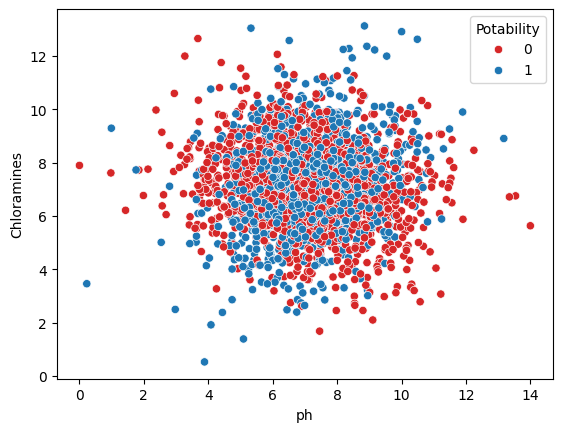

In [134]:
sns.scatterplot(x = 'ph', y = 'Chloramines', data = df, hue = df['Potability'], palette = ['tab:red', 'tab:blue'])
plt.show()

It is clear from the scatter plot that the level of chloramines in the water doesn't affect its potability by their own. Even when the levels are high the water can still be potable. This does not mean that water with high levels of chloramine should be drunk regularly.

#Fill missing values

In [136]:
#Fill missing values with the mean
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

# Convert dataframe to numpy arrays

In [137]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

#Split dataset to train-test

In [138]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

#**Decision Tree**

# Create a decision tree model

In [139]:
model = DecisionTreeClassifier(random_state = seed)

# Train model on training set

In [140]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#Evaluate Model on test and train set

### Prediction and accuracy on the test set

In [141]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model on the test set is: {accuracy_percentage}')

The accuracy of the model on the test set is: 57.48


### Prediction and accuracy on the train set

In [142]:
y_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model on the test set is: {accuracy_percentage}')

The accuracy of the model on the test set is: 100.0


The model that it is created is bad and not suitable for this dataset. There are two problems with it. Firstly, the model overfits the data (the accuracy on the train test is 99.87% while on the test set is 56.78%).Secondly, the accuracy is lower than the non potable percentage. That means that if we would predict every observation as non potable, its accuracy would be higher.

#Create parameter dictionary

In [143]:
#create a dictionary with every parameter we want to test
parameters = {'criterion': ('gini','entropy'),
              'max_depth': (None, 3, 5),
              'min_samples_split': (2, 5),
              'min_samples_leaf': (1,2),
              'max_features': (None, 'sqrt'),
              'ccp_alpha': (0, 0.01)
              }

# Get accuracy on every combination of the parameters

In [144]:
matrix = []

for parameter in ParameterGrid(parameters):

  row = []

  #create model
  model = DecisionTreeClassifier(criterion = parameter['criterion'], max_depth = parameter['max_depth'],
                                 min_samples_split = parameter['min_samples_split'], min_samples_leaf = parameter['min_samples_leaf'],
                                 max_features = parameter['max_features'], ccp_alpha = parameter['ccp_alpha'], random_state = seed)

  row.extend((parameter['criterion'], parameter['max_depth'], parameter['min_samples_split'], parameter['min_samples_leaf'], parameter['max_features'], parameter['ccp_alpha']))

  #fit model
  model.fit(x_train, y_train)

  #predict test data
  y_pred = model.predict(x_test)

  #get accuracy on test data
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_percentage = round(accuracy*100, 2)

  #append test accuracy percentage
  row.append(accuracy_percentage)

  #predict train data
  y_pred = model.predict(x_train)

  #get accuracy on train data
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_percentage = round(accuracy*100, 2)

  #append train accuracy percentage
  row.append(accuracy_percentage)

  matrix.append(row)

#create accuracies dataframe
accuracies = pd.DataFrame(matrix, columns = [*parameters, 'test_accuracy', 'train_accuracy'])

accuracies

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,test_accuracy,train_accuracy
0,gini,NaN,2,1,None,0.00,57.48,100.00
1,gini,NaN,5,1,None,0.00,56.46,97.12
2,gini,NaN,2,2,None,0.00,58.19,95.16
3,gini,NaN,5,2,None,0.00,59.10,94.33
4,gini,NaN,2,1,sqrt,0.00,62.26,100.00
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,2,None,0.01,62.67,62.01
92,entropy,5.0,2,1,sqrt,0.01,62.67,62.01
93,entropy,5.0,5,1,sqrt,0.01,62.67,62.01
94,entropy,5.0,2,2,sqrt,0.01,62.67,62.01


#Show accuracies when max_depth = 3

In [145]:
#get accuracies when max_depth = 3
max_depth_3 = accuracies[(accuracies['max_depth'] == 3)]

#reset index for easy search
max_depth_3.reset_index(drop=True, inplace=True)

#find best accuracy on max_depth = 3
best_accuracy = max_depth_3.iloc[max_depth_3.test_accuracy.idxmax(),: ]

best_accuracy

,8
criterion,entropy
max_depth,3.0
min_samples_split,2
min_samples_leaf,1
max_features,None
ccp_alpha,0.0
test_accuracy,63.99
train_accuracy,64.11


#Create and fit model on new found parametes

In [146]:
model = DecisionTreeClassifier(criterion = best_accuracy['criterion'], max_depth = int(best_accuracy['max_depth']),
                                 min_samples_split = best_accuracy['min_samples_split'], min_samples_leaf = best_accuracy['min_samples_leaf'],
                                 max_features = best_accuracy['max_features'], ccp_alpha = best_accuracy['ccp_alpha'], random_state = seed)

model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=3, min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2), random_state=0)

# Plot tree from trained model

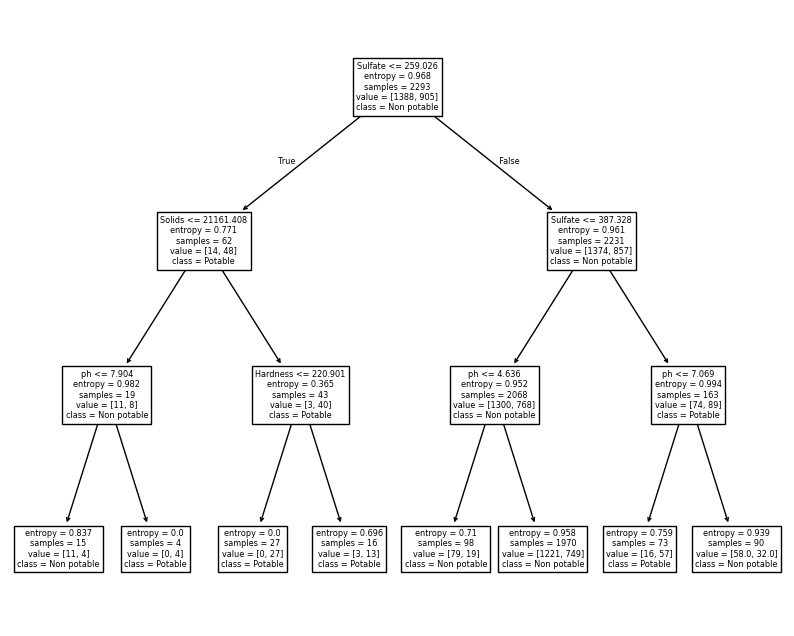

In [147]:
#making the image larger on google collab
f, ax = plt.subplots(1, figsize=(10,8))

plot_tree(model, feature_names = df.columns, class_names = ['Non potable', 'Potable'], filled = False)

plt.show()

The first rule of the decision tree is if the sulfate level in the water is below 259.026. If it's true then go to the left and check the value for the solids, otherwise go the the right of the tree and check again for the sulfate levels. This pattern continues (left if the rule is true, right if it's false) until it gets to a leaf node. Instead of writing every rule like that, it would be better to express them with some kind of pseudocode.

```
if sulfate <= 259.026:
  if solids <= 21161.408:
     if ph <= 7.904:
       The water is non potable
     else:
       The water is potable
  else:
     The water is potable
else:
  if sulfate <= 387.328:
     The water is non potable
  else:
     if ph <= 7.069:
       The water is potable
     else:
       The water is non potable
```



#Get overall best accuracy

In [148]:
#find best accuracy on max_depth = 3
best_accuracy = accuracies.iloc[accuracies.test_accuracy.idxmax(),: ]

best_accuracy

,42
criterion,entropy
max_depth,5.0
min_samples_split,2
min_samples_leaf,2
max_features,None
ccp_alpha,0.0
test_accuracy,65.51
train_accuracy,67.12


#Create and fit model on best accuracy

In [149]:
model = DecisionTreeClassifier(criterion = best_accuracy['criterion'], max_depth = int(best_accuracy['max_depth']),
                                 min_samples_split = best_accuracy['min_samples_split'], min_samples_leaf = best_accuracy['min_samples_leaf'],
                                 max_features = best_accuracy['max_features'], ccp_alpha = best_accuracy['ccp_alpha'], random_state = 0)

model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=5, min_samples_leaf=np.int64(2),
                       min_samples_split=np.int64(2), random_state=0)

# Feature importance

Feature 0: ph, Score: 0.24477
Feature 1: Hardness, Score: 0.09139
Feature 2: Solids, Score: 0.08640
Feature 3: Chloramines, Score: 0.19196
Feature 4: Sulfate, Score: 0.29896
Feature 5: Conductivity, Score: 0.01286
Feature 6: Organic_carbon, Score: 0.00000
Feature 7: Trihalomethanes, Score: 0.05354
Feature 8: Turbidity, Score: 0.02013


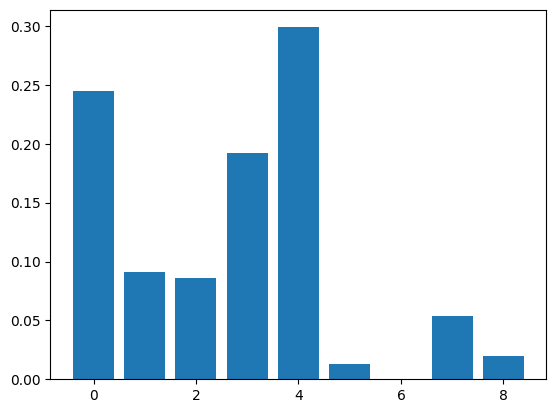

In [150]:
importance = model.feature_importances_

for i, v in enumerate(importance):
    print(f'Feature {i}: {df.columns[i]}, Score: {v:.5f}')
plt.bar([x for x in range(len(importance))], importance)
plt.show()

If we wanted to use only 5 features, then we would choose (from best to worse): sulfate, ph, chloramines, hardness and solids. We chose these specific ones because they  minimize the critirion that its chosen(in this case its enthropy). This means that these features have the best information gain out of all the features.

#**Random Forest**

# Why a model based on random forest could get better results

A model based on random forest could get better results because the model trains multiple decision trees (each one with a different subset of features) and then uses all these trees to make a prediction based on what the most trees predicted. If most of the trees predicted (majority of votes) that an observation belongs to a specific class, then the final prediction is of that class.

# Update parameter dictionary

In [151]:
#add new parameter
parameters = {'criterion': ('gini','entropy'),
              'max_depth': (None, 3, 5),
              'min_samples_split': (2, 5),
              'min_samples_leaf': (1,2),
              'max_features': (None, 'sqrt'),
              'ccp_alpha': (0, 0.01),
              'n_estimators': (50, 100, 200)
              }

#Get accuracy on every combination of the parameters

In [152]:
seed = 0

matrix = []

for parameter in ParameterGrid(parameters):

  row = []

  #create model
  model = RandomForestClassifier(criterion = parameter['criterion'], max_depth = parameter['max_depth'],
                                 min_samples_split = parameter['min_samples_split'], min_samples_leaf = parameter['min_samples_leaf'],
                                 max_features = parameter['max_features'], ccp_alpha = parameter['ccp_alpha'],
                                 n_estimators = parameter['n_estimators'], random_state = seed)

  row.extend((parameter['criterion'], parameter['max_depth'], parameter['min_samples_split'],
              parameter['min_samples_leaf'], parameter['max_features'], parameter['ccp_alpha'],
              parameter['n_estimators']))

  #fit model
  model.fit(x_train, y_train)

  #predict test data
  y_pred = model.predict(x_test)

  #get accuracy on test data
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_percentage = round(accuracy*100, 2)

  #append test accuracy percentage
  row.append(accuracy_percentage)

  #predict train data
  y_pred = model.predict(x_train)

  #get accuracy on train data
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_percentage = round(accuracy*100, 2)

  #append train accuracy percentage
  row.append(accuracy_percentage)

  matrix.append(row)

#create accuracies dataframe
accuracies = pd.DataFrame(matrix, columns = [*parameters, 'test_accuracy', 'train_accuracy'])

accuracies

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,n_estimators,test_accuracy,train_accuracy
0,gini,NaN,2,1,None,0.00,50,67.24,100.00
1,gini,NaN,2,1,None,0.00,100,67.75,100.00
2,gini,NaN,2,1,None,0.00,200,68.57,100.00
3,gini,NaN,5,1,None,0.00,50,66.94,99.87
4,gini,NaN,5,1,None,0.00,100,67.85,100.00
...,...,...,...,...,...,...,...,...,...
283,entropy,5.0,2,2,sqrt,0.01,100,62.77,62.32
284,entropy,5.0,2,2,sqrt,0.01,200,62.87,62.36
285,entropy,5.0,5,2,sqrt,0.01,50,62.87,62.36
286,entropy,5.0,5,2,sqrt,0.01,100,62.87,62.36


# False positives and false negatives

In the case of water potability it is worse if there are more false positives than false negatives in its predictions, because if the model predicted that the water is potable and it is not, it could lead to severe dehydration, diarrhea and possibly to death.

# Legally safer: random forest or decision tree

The legally safer option for a company is to use a model based on a decision tree. Because of its simplicity, the explainability is better and they can show at any time how the prediction got made.